In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [53]:
fn = lambda x: x ** 3

In [54]:
last = keras.layers.Dense(units=1, input_shape=[1], activation="linear", use_bias=True)
last.trainable = True


model = keras.Sequential([
    keras.layers.Dense(units=2**4, input_shape=[1], activation="tanh"),
    keras.layers.Dense(units=2**5, activation="tanh"),
    keras.layers.Dense(units=2**6, activation="tanh"),
    keras.layers.Dense(units=2**7, activation="tanh"),
    keras.layers.Dense(units=2**7, activation="tanh"),
    keras.layers.Dense(units=2**6, activation="tanh"),
    keras.layers.Dense(units=2**5, activation="tanh"),
    keras.layers.Dense(units=2**4, activation="tanh"),
    keras.layers.Dense(units=2**3, activation="tanh"),
    keras.layers.Dense(units=2**2, activation="tanh"),

    last,
])

model.compile(optimizer="adam", loss="mean_squared_error")

In [55]:
def unison_shuffle(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [71]:
    
train_x = linespace = np.expand_dims(np.arange(-10, 10, 0.005), axis=1) 

scaler = MinMaxScaler()
scaler.fit(train_x)

train_y = fn(train_x)
train_x = scaler.transform(train_x)
train_y = scaler.transform(train_y)




#train_x, train_y = unison_shuffle(train_x, train_y)

# split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=False)


print(train_x.shape)
print(train_y.shape)
print(test_y.shape)
print(test_x.shape)


(3200, 1)
(3200, 1)
(800, 1)
(800, 1)


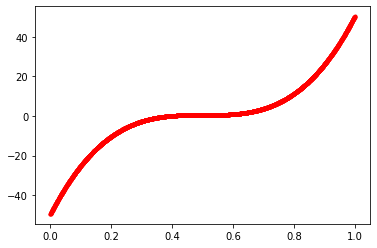

In [57]:
# plot train_x test_x
plt.plot(train_x, train_y, "r.")
#plt.plot(test_x, test_y, "b.")
plt.show()


In [58]:
# checkpoint callback to save the model with least loss
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="model.h5",
    save_best_only=True,
    verbose=1,
    monitor="loss",
    mode="min",
)

In [59]:
history = model.fit(train_x, train_y, validation_data=(test_x,test_y), callbacks=[checkpoint_callback], epochs=300)

Epoch 1/300
100/100 [==============================] - 1s 4ms/step - loss: 336.6134 - val_loss: 321.4585

Epoch 00001: loss improved from inf to 336.61343, saving model to model.h5
Epoch 2/300
100/100 [==============================] - 0s 2ms/step - loss: 324.2372 - val_loss: 311.7865

Epoch 00002: loss improved from 336.61343 to 324.23718, saving model to model.h5
Epoch 3/300
100/100 [==============================] - 0s 2ms/step - loss: 314.3108 - val_loss: 302.4980

Epoch 00003: loss improved from 324.23718 to 314.31079, saving model to model.h5
Epoch 4/300
  1/100 [..............................] - ETA: 0s - loss: 323.5277

KeyboardInterrupt: 

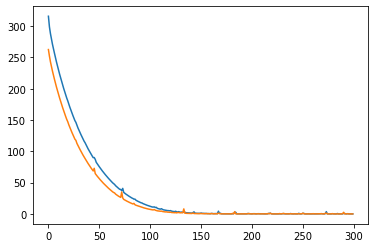

In [ ]:
# plot keras fit history
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 16)                32        
                                                                 
 dense_152 (Dense)           (None, 32)                544       
                                                                 
 dense_153 (Dense)           (None, 64)                2112      
                                                                 
 dense_154 (Dense)           (None, 128)               8320      
                                                                 
 dense_155 (Dense)           (None, 128)               16512     
                                                                 
 dense_156 (Dense)           (None, 64)                8256      
                                                                 
 dense_157 (Dense)           (None, 32)              

In [ ]:
model.save("reg_linear_out.h5")

In [ ]:
model = keras.models.load_model("model.h5")

In [60]:
model.evaluate(test_x, test_y)

25/25 [==============================] - 0s 1ms/step - loss: 300.4682


300.4681701660156

In [ ]:
ext_linespace = np.expand_dims(np.arange(-15, 15, 0.01), axis=1) 
ext_linespace = train_x

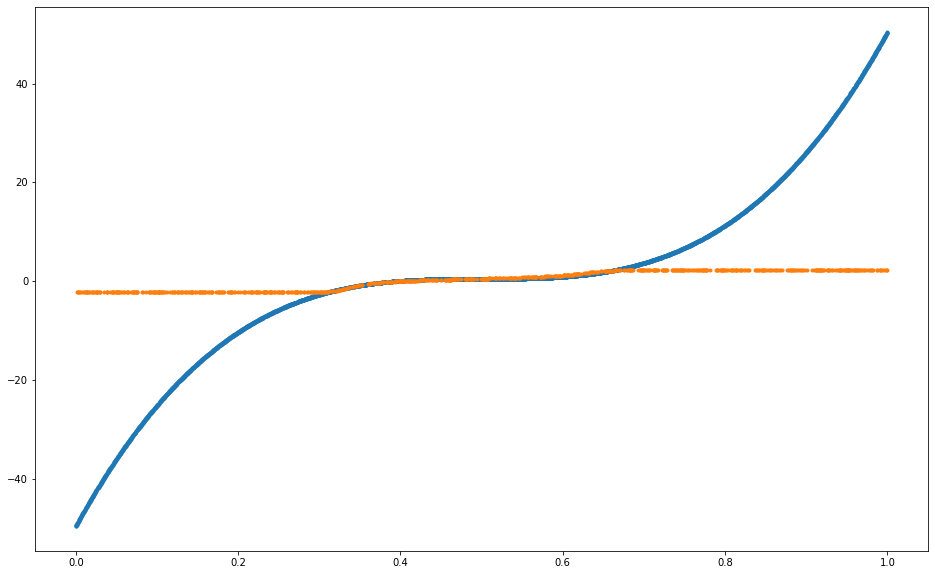

In [61]:
pred = model.predict(test_x)

# save pred to linespace .npy
np.save("linespace.npy", test_x)
plt.figure(figsize=(16,10))
# plot the results
plt.plot(train_x, train_y, "." )
plt.plot(test_x, pred, ".", label="pred", )
plt.show()

In [ ]:
print(train_x[7])
print(pred[7])

[0.52988247]
[-12.26368]


In [ ]:
def representative_data_gen():
  for input_value in train_x:
    yield [input_value.astype(np.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)


tflite_model_quant = converter.convert()

interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

INFO:tensorflow:Assets written to: C:\Users\Jorge\AppData\Local\Temp\tmpwhs1p7n9\assets


INFO:tensorflow:Assets written to: C:\Users\Jorge\AppData\Local\Temp\tmpwhs1p7n9\assets
C:\Users\Jorge\anaconda3\envs\itcl\lib\site-packages\tensorflow\python\framework\meta_graph.py:818: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils_version.LooseVersion(tf_version)
C:\Users\Jorge\anaconda3\envs\itcl\lib\site-packages\tensorflow\python\framework\meta_graph.py:819: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  >= distutils_version.LooseVersion("1.9"))
C:\Users\Jorge\anaconda3\envs\itcl\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


In [ ]:
import pathlib
tflite_models_dir = pathlib.Path(".")
tflite_models_dir.mkdir(exist_ok=True, parents=True)


# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"x3 727loss.tflite"
#tflite_model_quant_file.write_bytes(tflite_model_quant)

In [ ]:
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))

In [75]:

interpreter.allocate_tensors()

predicted = []
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]


for x, y in zip (train_x, train_y):
    interpreter.set_tensor(input_details["index"], [x.astype("float32")])
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    predicted.append(output[0])

In [76]:
print(np.array(train_y).shape)

(3200, 1)


In [77]:
np_predicted = np.array(predicted)
np_predicted = np.expand_dims(np_predicted, axis=1)
print(np_predicted.shape)

(3200, 1)


In [78]:
from itertools import groupby
def interpolate_noise(arr: np.ndarray):
    

    res = []

    for k, g in groupby(arr):
        segment = [None] * len(list(g))
        segment[len(segment)  // 2] = k
        res.extend(segment)

    #res = np.array(res, dtype=object)

    x = np.array(res, dtype="float32")

    xp = [i for i, yi in enumerate(x) if np.isfinite(yi)]
    fp = [yi for i, yi in enumerate(x) if np.isfinite(yi)]
    return np.interp(x=list(range(len(x))), xp=xp, fp=fp)

In [88]:
interpolated = interpolate_noise(np_predicted)
interpolated = np.expand_dims(interpolated, axis=1)

c:\Users\jorge.ruiz\Documents\venvs\movenet\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  


In [80]:
# mean square error between predicted and train_y
print("MSE", np.mean((np_predicted - train_y) ** 2))

MSE 0.2715812842257884


In [89]:
print("Interpolated MSE", np.mean((interpolated - train_y) ** 2))

Interpolated MSE 0.13620017704456944


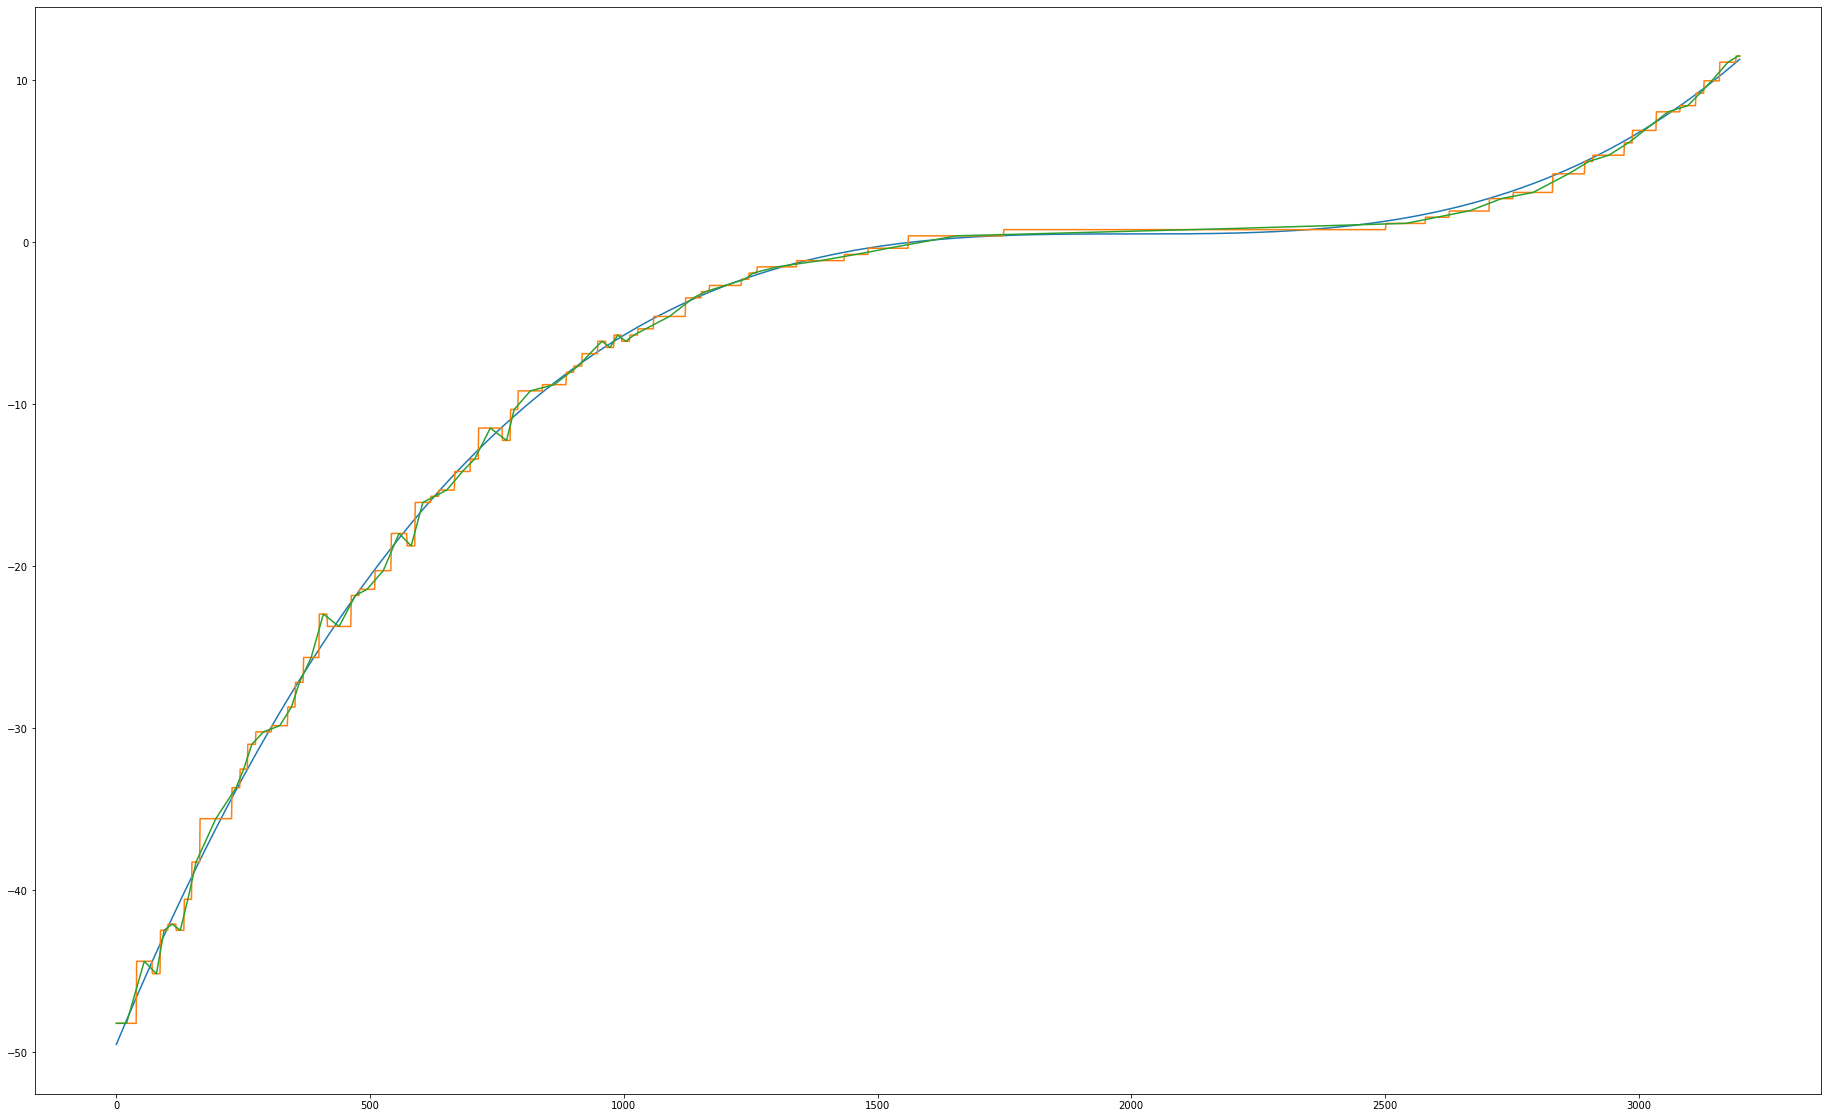

In [90]:
# plot pred and train_y
# increment the plot size
plt.figure(figsize=(32,20))

plt.plot(train_y)
plt.plot(predicted)
plt.plot(interpolated)